# Analyze *falcon* complexity

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
import config

dir = '../work_dir_SSD/CCLE_6000'
dirFig = 'analyzeFalconAlgorithm'
charge = 2
prefix = f'CCLE_6000_%d_%d_' % (charge, config.eps*100)


### Plot the complexity observed in practice

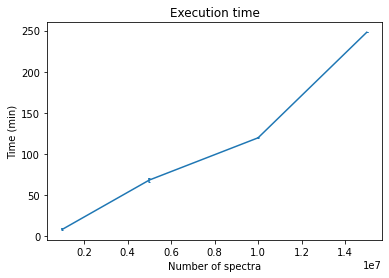

In [2]:
# Execution time for CCLE
size_time = [(1*10**6,  [7.14, 9.02, 8.66]),
             (5*10**6,  [70.74, 68.71, 65.27]),
             (10*10**6, [120.26, 118.90]), # TODO
             (15*10**6, [248.02])]
size = [e[0] for e in size_time]
av_t = np.asarray([np.mean(e[1]) for e in size_time])
err = np.zeros( (2, len(size_time)) )
err[0,:] = np.asarray([max(t[1]) for t in size_time]) - av_t
err[1,:] = av_t - np.asarray([min(t[1]) for t in size_time])

fig, ax = plt.subplots()
ax.errorbar(size, av_t, yerr=err, capsize=1)
ax.set(xlabel="Number of spectra", ylabel="Time (min)",
       title="Execution time")
fig.savefig(os.path.join(dirFig, 'complexity', 'pr_complexity.png'), dpi=300)
plt.show()

### Plot the complexity

In [3]:
def complexity_ANN(n):
    part = np.zeros(np.shape(n))
    srch = np.zeros(np.shape(n))

    # For n < 1000
    mask = np.where(n < 1000)
    part[mask] = 0
    srch[mask] = n[mask]**2

    # For 1000 <= n < 10^5
    mask = np.where( (1000 <= n) & (n < 10**5) )
    #time[mask] = 2**np.floor(np.log2(n[mask]/39))
    npartitions = 2**np.floor(np.log2(n[mask]/39))
    part[mask] = n[mask] * npartitions
    srch[mask] = n[mask]**2 / npartitions

    # For 10^5 < n <= 10^6
    mask = np.where( (10**5 <= n) & (n < 10**6) )
    part[mask] = n[mask] / 2**16
    srch[mask] = n[mask]**2 / 2**16

    # For 10^6 < n <= 10^7
    mask = np.where( (10**6 <= n) & (n < 10**7) )
    part[mask] = n[mask] / 2**18
    srch[mask] = n[mask]**2 / 2**18

    # For n > 10^7
    mask = np.where( n > 10**7 )
    part[mask] = n[mask] / 2**20
    srch[mask] = n[mask]**2 / 2**20

    part = part/np.max(part)
    srch = srch/np.max(srch)

    return part, srch

n = np.arange(0, 25000, 10)
t_part, t_srch = complexity_ANN(n)

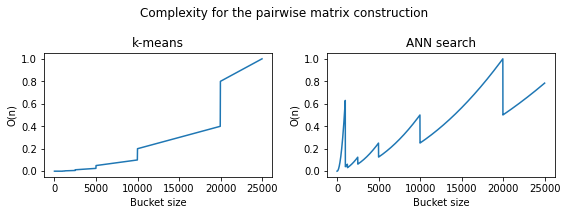

In [4]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
fig.suptitle("Complexity for the pairwise matrix construction")

#axs[0].set_xscale('log')
axs[0].plot(n, t_part)
axs[0].set(xlabel="Bucket size", ylabel="O(n)",
           title="k-means")

#axs[1].set_xscale('log')
axs[1].plot(n, t_srch)
axs[1].set(xlabel="Bucket size", ylabel="O(n)",
           title="ANN search")

fig.tight_layout()
fig.savefig(os.path.join(dirFig, 'complexity', 'th_complexity.png'), dpi=300)
plt.show()